[Text(0, 0.5, 'amazon stock price')]

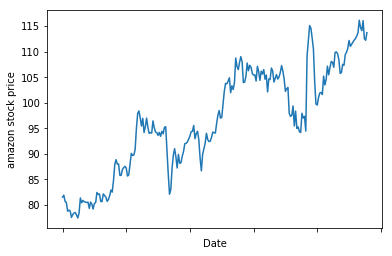

In [99]:
import pandas as pd
%matplotlib inline

data = pd.read_csv( 'facebook_result.csv',header=0 )
closingPrice = data['Close']
pos_polarity=data['pos']
neg_polarity=data['neg']
neu_polarity=data['neu']
closingPrice.index = data['Date']
pos_polarity.index = data['Date']
neg_polarity.index = data['Date']
neu_polarity.index = data['Date']
ax = closingPrice.plot(kind='line')
ax.set(ylabel='amazon stock price')


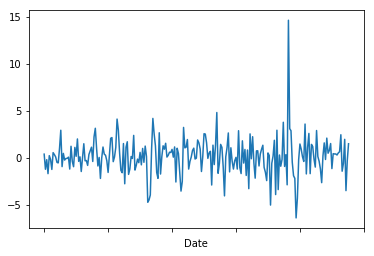

In [100]:
Num = closingPrice.shape[0]
price = pd.Series(closingPrice[1:Num].values - closingPrice[ 0:Num-1].values, index=closingPrice.index[1:])

price.plot(kind='line')

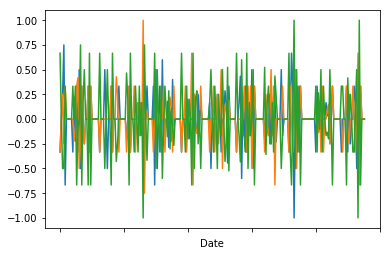

In [101]:
N = pos_polarity.shape[0]
Y = pd.Series(pos_polarity[1:N].values - pos_polarity[ 0:N-1].values, index=pos_polarity.index[1:])
Z = pd.Series(neg_polarity[1:N].values - neg_polarity[ 0:N-1].values, index=neg_polarity.index[1:])
L = pd.Series(neu_polarity[1:N].values - neu_polarity[ 0:N-1].values, index=neu_polarity.index[1:])
Y.plot(kind='line')
Z.plot(kind='line')
L.plot(kind='line')


In [102]:

N = Y.shape[0]
X = pd.DataFrame()
X['price t-3'] = price[1:N-2].values
X['price t-2'] = price[2:N-1].values
X['price t-1'] = price[3:N].values

X['pos t-3'] = Y[1:N-2].values
X['pos t-2'] = Y[2:N-1].values
X['pos t-1'] = Y[3:N].values

X['neg t-3'] = Z[1:N-2].values
X['neg t-2'] = Z[2:N-1].values
X['neg t-1'] = Z[3:N].values

X['neu t-3'] = L[1:N-2].values
X['neu t-2'] = L[2:N-1].values
X['neu t-1'] = L[3:N].values



X = X[:-1]

X.index = Y[4:].index
X.head()

,price t-3,price t-2,price t-1,pos t-3,pos t-2,pos t-1,neg t-3,neg t-2,neg t-1,neu t-3,neu t-2,neu t-1
Date,,,,,,,,,,,,
5/1/2015,-1.230004,-0.209999,-1.700004,0.000000,0.250000,0.750000,0.000000,0.250000,-0.250000,0.000000,-0.500000,-0.500000
5/4/2015,-0.209999,-1.700004,0.220001,0.250000,0.750000,-0.666667,0.250000,-0.250000,0.333333,-0.500000,-0.500000,0.333333
5/5/2015,-1.700004,0.220001,-0.180000,0.750000,-0.666667,0.000000,-0.250000,0.333333,0.000000,-0.500000,0.333333,0.000000
5/6/2015,0.220001,-0.180000,-1.250000,-0.666667,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000
5/7/2015,-0.180000,-1.250000,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [103]:
y=price[4:]
y.head()

Date
5/1/2015    0.220001
5/4/2015   -0.180000
5/5/2015   -1.250000
5/6/2015    0.540000
5/7/2015    0.330002
dtype: float64

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5)

In [121]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

# Apply model to the test set
y_pred = regr.predict(X_test)

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-square = %.4f" % r2_score(y_test, y_pred))
print('Slope Coefficients:', regr.coef_ )
print('Intercept:', regr.intercept_ )

Root mean squared error = 2.2536
R-square = -0.1205
Slope Coefficients: [-2.72690163e-01  2.90846617e-02  1.12687445e-01 -1.40588022e+09
 -7.62722018e+08  3.77886199e+08 -1.40588022e+09 -7.62722019e+08
  3.77886198e+08 -1.40588022e+09 -7.62722017e+08  3.77886199e+08]
Intercept: 0.18924187873757226
